# Practical Session on Exploratory Data Analysis for Machine Learning Applications

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#!pip install ucimlrepo

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_dt = fetch_ucirepo(id=17) 
# print(breast_cancer_dt)
  
# data (as pandas dataframes) 
X = breast_cancer_dt.data.features 
y = breast_cancer_dt.data.targets 
  
# metadata 
print(breast_cancer_dt.metadata) 
  
# variable information 
print(breast_cancer_dt.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

C:\Users\iulia\AppData\Local\Temp\ipykernel_41804\962424590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 0, 'B': 1})


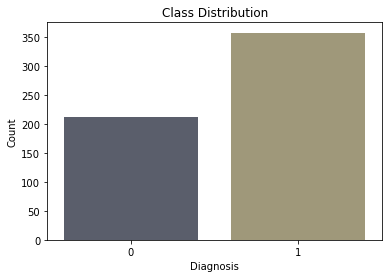

In [16]:
# transforming the target variables into numbers
y['Diagnosis'] = y['Diagnosis'].map({'M': 0, 'B': 1})
# class_ratios = df['y'].value_counts(normalize=True)
# print(class_ratios)

# Chechink the distribution of values in our target variable to see if the dataset is balanced
sns.countplot(x='Diagnosis', data=y, palette='cividis')

# Plotting the results
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [14]:
### # 1. Initial Data Exploration:
print(X.head())
print("\nShape of the dataset:", X.shape)
print("\nData types of each column:")
print(X.dtypes)
print("\nMissing values in each column:")
print(X.isnull().sum())


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

In [17]:
# 2. Summary Statistics:
print("\nSummary statistics for numerical columns:")
print(X.describe())



Summary statistics for numerical columns:
          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000 

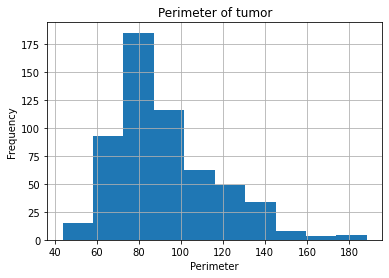

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


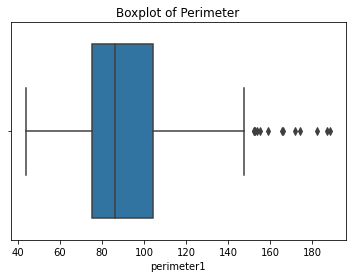

In [23]:
# 3. Visual Exploratory Data Analysis:

X['perimeter1'].hist()
plt.title('Perimeter of tumor')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(X['perimeter1'])
plt.title('Boxplot of Perimeter')
plt.show()

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010          0.14710     0.2419        

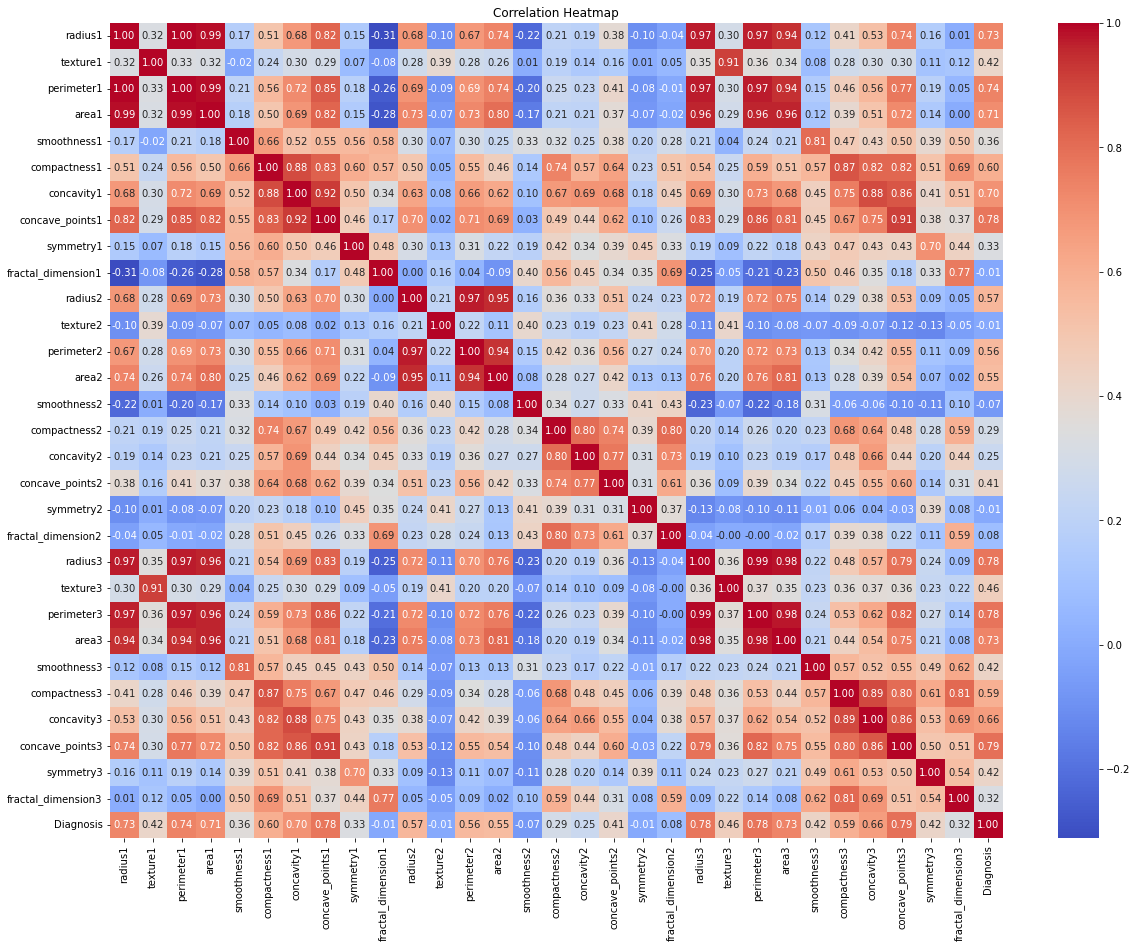

In [35]:
# Note: As this dataset doesn't contain categorical data, we skip the countplot

# 4. Correlation Analysis:

# Combine features and target variable
data = pd.concat([X, y], axis=1)

data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 0 if x == 'B' else 1 if x == 'M' else x)

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 15))  # Adjust the figure size if needed

# Assuming you want to create a heatmap of the correlation between features and the target variable
correlation_matrix = data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Customize the plot (labels, title, etc.) if needed
plt.title("Correlation Heatmap")
plt.show()


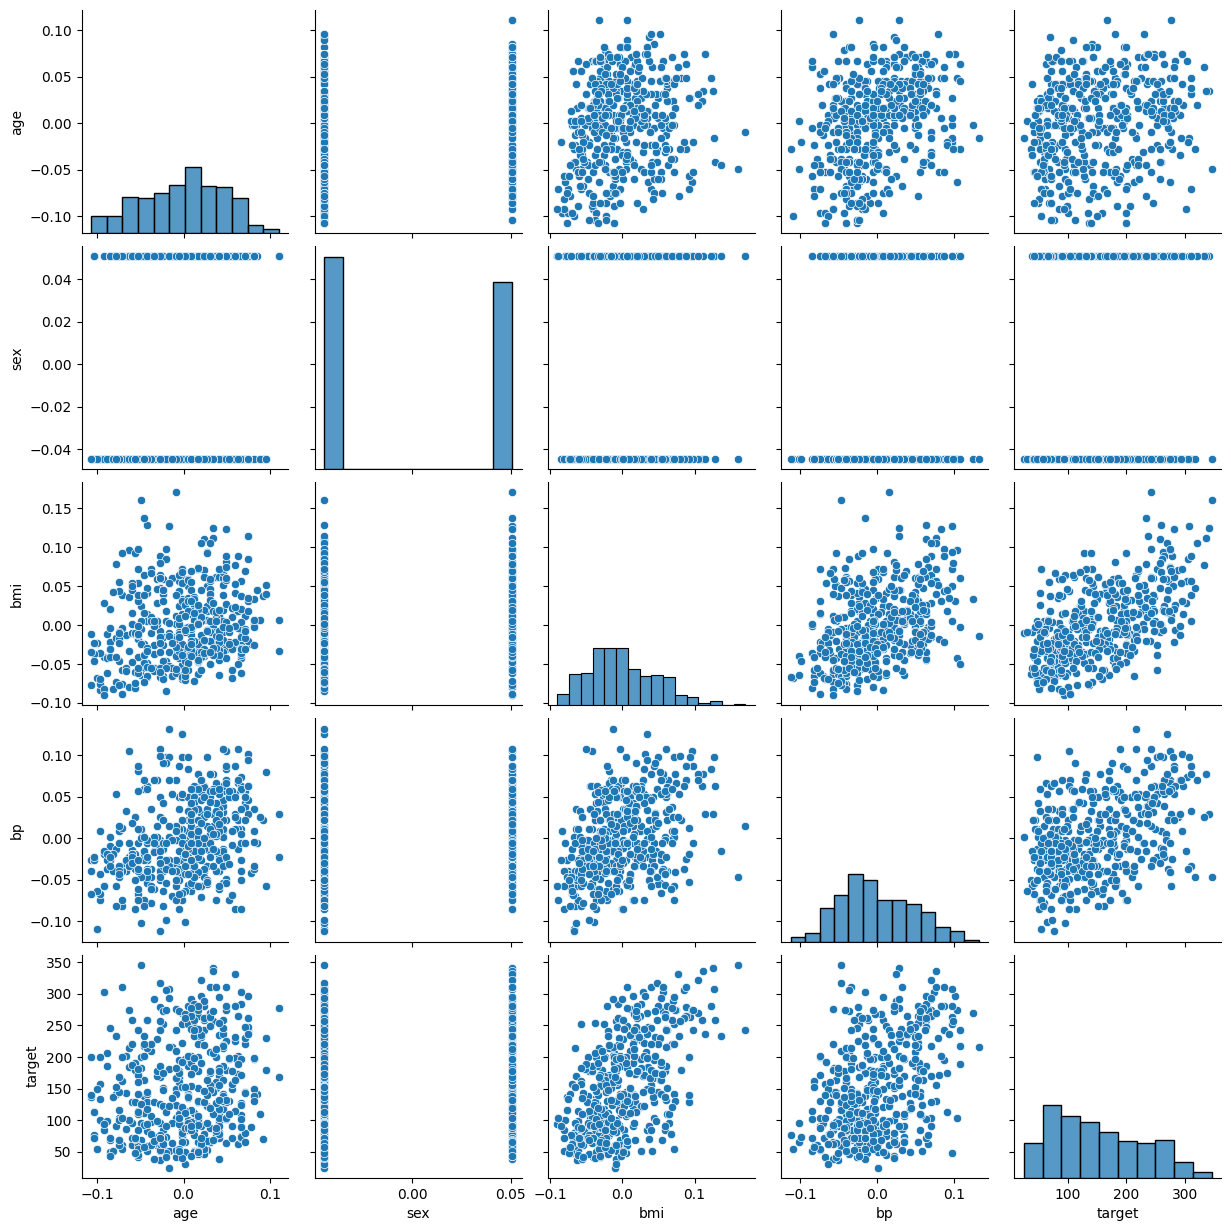

In [8]:

# 5. Advanced EDA:
# We'll use pairplot on a subset of columns for simplicity
sns.pairplot(data[['age', 'sex', 'bmi', 'bp', 'target']])
plt.show()